In [1]:
# built-in
import random
import copy
import sys

# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# stats
import scipy.stats as st

# pd options
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)

In [2]:
sys.path.append("../")
from utils import generate_eda, plot_venn2, plot_distributions

In [3]:
# generate_eda()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)
Report ../data/sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
train = pd.read_csv("../data/raw/train.csv")
test = pd.read_csv("../data/raw/test.csv")

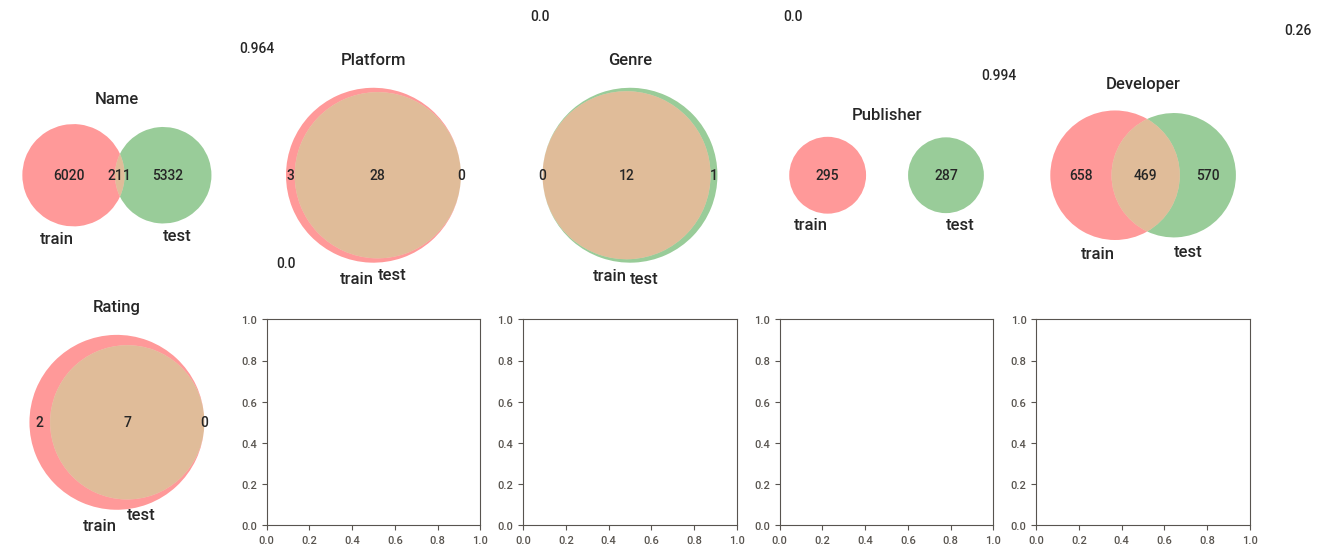

In [16]:
categorical_cols = ["Name", "Platform", "Genre", "Publisher", "Developer", "Rating"]
plot_venn2(train, test, include_cols=categorical_cols)

In [15]:
train.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales             int64
EU_Sales             int64
JP_Sales             int64
Other_Sales          int64
Global_Sales         int64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [22]:
train["User_Score"].value_counts()

tbd    1132
8       165
8.2     160
7.8     155
8.3     137
       ... 
0.9       1
1.9       1
1.1       1
0.5       1
1         1
Name: User_Score, Length: 88, dtype: int64